Compara as dimensões dos ventrículos simulados pelo cardiax e fisiopacer

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
#importa o arquivo com os dados da simulação do cardiax, que foi gerado para ser usado como fitness do AG
medidasCX = np.loadtxt("D:\\input\\pvloopconv\\exp4_medidas.txt")
#importa o arquivo com os dados do fisiopacer
fisiopacer = np.loadtxt("D:\\output\\pvloopconv\\fisiopacer.txt")
#importa o arquivo com os dados do cardiax
cardiax = np.loadtxt("cardiax.txt")


In [4]:
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['font.weight'] = 'bold'

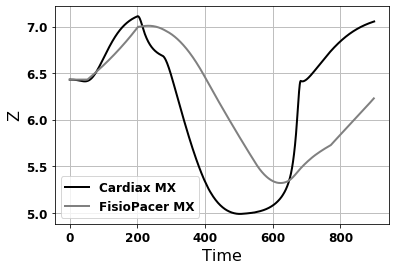

In [5]:
def plotComp(iMinFp, iMaxFp, iMinCx, iMaxCx, eixoTit):
    plt.plot(range(len(medidasCX[:,iMaxCx])), medidasCX[:, iMaxCx], '-', color='black', label='Cardiax MX', lw=2)
    plt.plot(fisiopacer[:, 0], fisiopacer[:, iMaxFp], '-', color='gray', label='FisioPacer MX', lw=2)
    plt.xlabel(u"Time")
    plt.ylabel(eixoTit)
    plt.grid(True, lw=1., color='0.75', zorder=0)
    plt.legend(loc='best', numpoints=1)
    #plt.axis([0, 670, min(fisiopacer[:, iMaxFp]), max(fisiopacer[:, iMaxFp])])
    plt.show()

plotComp(15,18,2,5,'Z')

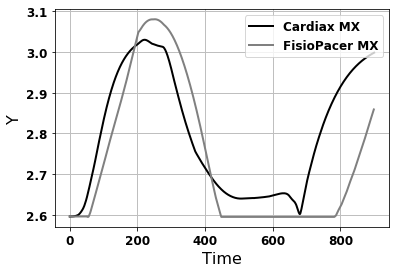

In [6]:
plotComp(14,17,1,4,'Y')

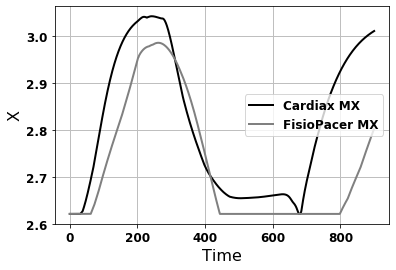

In [7]:
plotComp(13,16,0,3,'X')

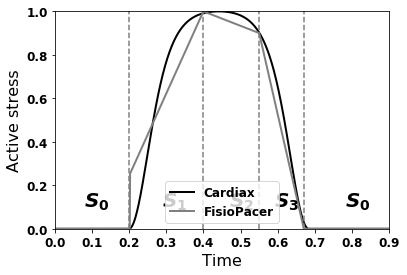

<Figure size 432x288 with 0 Axes>

In [10]:


plt.plot(cardiax[:, 0], cardiax[:, 2], '-', color='black', label='Cardiax', lw=2)
plt.plot(fisiopacer[:, 0]/1000, fisiopacer[:, 5], '-', color='gray', label='FisioPacer', lw=2)
plt.plot([0.20, 0.20], [0, 1], '--', color='gray')
plt.plot([0.40, 0.40], [0, 1], '--', color='gray')
plt.plot([0.55, 0.55], [0, 1], '--', color='gray')
plt.plot([0.67, 0.67], [0, 1], '--', color='gray')
sizFnt=20
ypos = 0.1
plt.text(0.08, ypos, '$S_0$', fontsize=sizFnt)
plt.text(0.29, ypos, '$S_1$', fontsize=sizFnt)
plt.text(0.47, ypos, '$S_2$', fontsize=sizFnt)
plt.text(0.59, ypos, '$S_3$', fontsize=sizFnt)
plt.text(0.78, ypos, '$S_0$', fontsize=sizFnt)


plt.xlabel(u"Time")
plt.ylabel(u"Active stress")
plt.grid(True, lw=0., color='0.75', zorder=0)
plt.legend(loc='best', numpoints=1)
plt.axis([0, 0.9, 0, 1])
#plt.xticks([], [])
#plt.yticks([], [])

plt.show()
plt.clf()



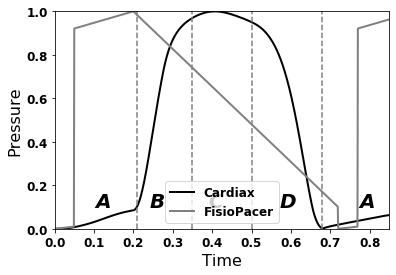

In [9]:
ypos = 0.1
sizFnt=20
plt.plot(cardiax[:, 0], cardiax[:, 1]/max(cardiax[:, 1]), '-', color='black', label='Cardiax', lw=2)
plt.plot(fisiopacer[:, 0]/1000, fisiopacer[:, 11], '-', color='gray', label='FisioPacer', lw=2)
#plt.plot(fisiopacer[:, 0]/1000, fisiopacer[:, 12], '-', mfc='green', label='FisioPacer D')
plt.plot([0.21, 0.21], [0, 1], '--', color='gray')
plt.plot([0.35, 0.35], [0, 1], '--', color='gray')
plt.plot([0.50, 0.50], [0, 1], '--', color='gray')
plt.plot([0.68, 0.68], [0, 1], '--', color='gray')
plt.xlabel(u"Time")
plt.ylabel(u"Pressure")
plt.grid(True, lw=0., color='0.75', zorder=0)
plt.legend(loc='best', numpoints=1)
plt.axis([0, 0.85, 0, 1])
#plt.xticks([], [])
#plt.yticks([], [])
plt.text(0.10, ypos, '$A$', fontsize=sizFnt)
plt.text(0.24, ypos, '$B$', fontsize=sizFnt)
plt.text(0.39, ypos, '$C$', fontsize=sizFnt)
plt.text(0.57, ypos, '$D$', fontsize=sizFnt)
plt.text(0.77, ypos, '$A$', fontsize=sizFnt)


plt.savefig('press_st.png', inches_bbox='tight')
plt.show()



In [58]:
#
##
def getRelativeError(target, val):
    relError = 0.;
    if abs(target)==0.0:
        return (0.,0)
    return (abs(target-val)/abs(target), 1)

def sumError(errCont, target, val):
    ret = getRelativeError(target, val)
    errCont[0] += ret[0];
    errCont[1] +=ret[1];
    return errCont
    
    
##
#
def getErrorStep(i):
    errCont = [0., 0];
    # min X
    errCont = sumError(errCont, medidasCX[i][0], fisiopacer[i][13])
    # max X
    errCont = sumError(errCont, medidasCX[i][3], fisiopacer[i][16])
    # min Y
    errCont = sumError(errCont, medidasCX[i][1], fisiopacer[i][14])
    # max Y
    errCont = sumError(errCont, medidasCX[i][4], fisiopacer[i][17])
    # min Z
    errCont = sumError(errCont, medidasCX[i][2], fisiopacer[i][15])
    # max Z
    errCont = sumError(errCont, medidasCX[i][5], fisiopacer[i][18])
    print(errCont, " = ", errCont[0]/errCont[1])
    return errCont[0]/errCont[1]


erro =0;
erro += getErrorStep(i=200)
erro += getErrorStep(i=500)
erro += getErrorStep(i=678)


print(erro)


[0.6372190631866036, 5]  =  0.1274438126373207
[0.33119386757341573, 5]  =  0.06623877351468314
[0.033409805263078726, 5]  =  0.006681961052615745
0.2003645472046196
